<a href="https://colab.research.google.com/github/Glitch0110/AI-GiganciProgramowania/blob/main/L14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [341]:
df = sns.load_dataset('titanic')

print(df.tail(10))

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
881         0       3    male  33.0      0      0   7.8958        S   Third   
882         0       3  female  22.0      0      0  10.5167        S   Third   
883         0       2    male  28.0      0      0  10.5000        S  Second   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
881    man        True  NaN  Southampton    no   True  
882  woman       F

In [342]:

df = df.dropna(subset=['age'])
print(df.isnull().sum())
print(len(sns.load_dataset('titanic')))
print("After cleaning: ", len(df))

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64
891
After cleaning:  714


In [343]:
def categorize_fare(fare, fare_ranges):
  if fare <= fare_ranges[0]:
    return 0
  elif fare <= fare_ranges[1]:
    return 1
  else:
    return 2
min_fare = df['fare'].min()
max_fare = df['fare'].max()

fare_step = (max_fare - min_fare) / 3
fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step]

print("\nPrzedziały cenowe biletów:")
print(f"Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
print(f"Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")

print("Najmniej zapłacił: ", min_fare)
print("Najwięcej zapłacił: ", max_fare)


Przedziały cenowe biletów:
Niska: 0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka: 341.55 - 512.33
Najmniej zapłacił:  0.0
Najwięcej zapłacił:  512.3292


In [344]:
selected_features = ['sex', 'pclass', 'age', 'fare_category']
df_model = df.copy()

df_model['sex'] = df_model['sex'].map({'male': 0, 'female': 1})
df_model['fare_category'] = df_model['fare'].apply(lambda x: categorize_fare(x, fare_ranges))


In [345]:
X = df_model[selected_features]
Y = df_model['survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state =35)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [346]:
model = LogisticRegression(
    random_state=30,
    C=0.2
)
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Dokładność: {accuracy:.4f}")

Dokładność: 0.7832


              precision    recall  f1-score   support

           0       0.81      0.84      0.82        85
           1       0.75      0.71      0.73        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

Fałszywe alarmy:  0.16470588235294117


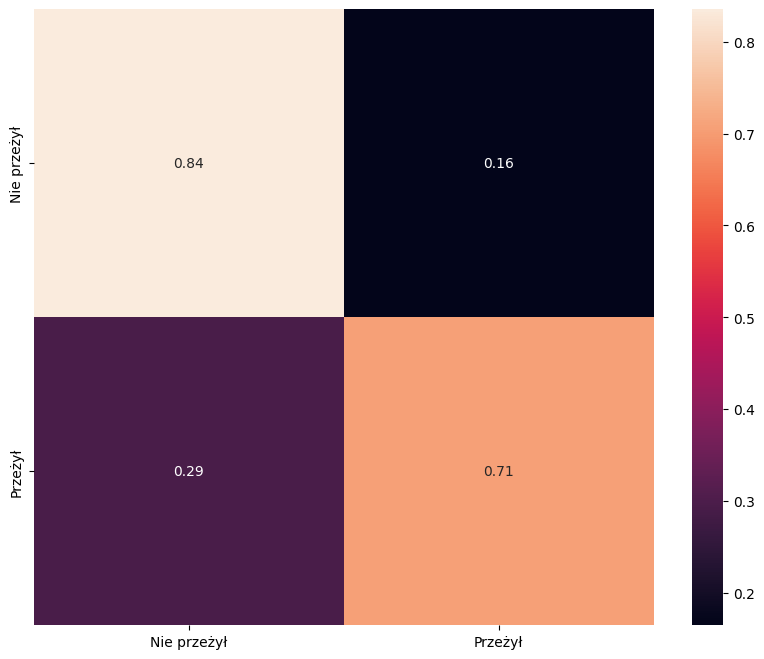

In [347]:
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred, normalize="true")

tn, fp, fn, tp = conf_matrix.ravel()
print("Fałszywe alarmy: ", fp)

plt.figure(figsize=(10,8))
plt.xlabel('Przeidywanie')
plt.ylabel('Rzeczywistość')
sns.heatmap(conf_matrix, annot=True, xticklabels=["Nie przeżył", "Przeżył"], yticklabels=["Nie przeżył", "Przeżył"])
plt.show()

In [348]:
while True:
    print("\nPrognoza przeżycia dla nowego pasażera")
    print("(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)")

    try:
        # --- PŁEĆ ---
        sex_input = input("\nPodaj płeć (m/k): ").lower()
        if sex_input == 'koniec':
            break
        if sex_input not in ['m', 'k']:
            print("Błąd: wpisz 'm' (mężczyzna) lub 'k' (kobieta).")
            continue
        sex = 1 if sex_input == 'k' else 0

        # --- KLASA ---
        pclass_input = input("Podaj klasę (1/2/3): ")
        if pclass_input == 'koniec':
            break
        pclass = int(pclass_input)
        if pclass not in [1, 2, 3]:
            print("Błąd: klasa musi być 1, 2 lub 3.")
            continue

        # --- WIEK ---
        age_input = input("Podaj wiek: ")
        if age_input == 'koniec':
            break
        age = float(age_input)
        if age <= 0:
            print("Błąd: wiek musi być dodatni.")
            continue

        # --- CENA BILETU (użyjemy categorize_fare jak przy tworzeniu df_model) ---
        print("\nPrzedziały cenowe biletów (na podstawie danych):")
        print(f"Niska:   {min_fare:.2f} - {fare_ranges[0]:.2f}")
        print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
        print(f"Wysoka:  {fare_ranges[1]:.2f} - {max_fare:.2f}")

        fare_input = input("\nPodaj cenę biletu (liczba): ")
        if fare_input == 'koniec':
            break
        fare = float(fare_input)

        # ta sama logika, co w df_model['fare_category']
        fare_category = categorize_fare(fare, fare_ranges)

        # --- KONSTRUKCJA DANYCH W TEJ SAMEJ POSTACI CO X ---
        new_passenger = pd.DataFrame([{
            'sex': sex,
            'pclass': pclass,
            'age': age,
            'fare_category': fare_category
        }])[selected_features]  # zachowujemy dokładnie tę samą kolejność kolumn

        # --- SKALOWANIE I PREDYKCJA ---
        new_passenger_scaled = scaler.transform(new_passenger)
        prediction = model.predict(new_passenger_scaled)
        probability = model.predict_proba(new_passenger_scaled)

        # --- WYNIKI ---
        print("\nWyniki prognozy:")
        print(f"Płeć: {'Kobieta' if sex == 1 else 'Mężczyzna'}")
        print(f"Klasa: {pclass}")
        print(f"Wiek: {age}")
        print(
            "Kategoria cenowa: "
            f"{'Niska' if fare_category == 0 else 'Średnia' if fare_category == 1 else 'Wysoka'}"
        )
        print(f"Przewidywanie przeżycia: {'Tak' if prediction[0] == 1 else 'Nie'}")
        print(f"Prawdopodobieństwo przeżycia: {probability[0][1]:.2%}")

    except ValueError:
        print("\nBłąd: wprowadź poprawne wartości numeryczne!")
    except Exception as e:
        print(f"\nWystąpił błąd: {e}")

    kontynuuj = input("\nCzy chcesz sprawdzić kolejnego pasażera? (t/n): ").lower()
    if kontynuuj != 't':
        break

print("\nKoniec programu")


Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)

Podaj płeć (m/k): m
Podaj klasę (1/2/3): 2
Podaj wiek: 12

Przedziały cenowe biletów (na podstawie danych):
Niska:   0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka:  341.55 - 512.33

Podaj cenę biletu (liczba): 40

Wyniki prognozy:
Płeć: Mężczyzna
Klasa: 2
Wiek: 12.0
Kategoria cenowa: Niska
Przewidywanie przeżycia: Nie
Prawdopodobieństwo przeżycia: 36.83%

Czy chcesz sprawdzić kolejnego pasażera? (t/n): t

Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)

Podaj płeć (m/k): k
Podaj klasę (1/2/3): 7
Błąd: klasa musi być 1, 2 lub 3.

Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)

Podaj płeć (m/k): k
Podaj klasę (1/2/3): 2
Podaj wiek: 7

Przedziały cenowe biletów (na podstawie danych):
Niska:   0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka:  341.55 - 512.33

Podaj cenę biletu (liczba): 35

Wyniki prognozy:
Płeć: K